In [1]:
import sys
print(sys.executable)
import wordcloud
#!<E:\Anaconda\python.exe>/python -m pip install wordcloud
#!pip install sklearn

E:\Anaconda\python.exe


In [2]:
#!pip install seaborn
#!pip install matplotlib

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [71]:
import pandas as pd
dataset = pd.read_csv("BBC News Train.csv")
dataset.Text[2]

'bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service poll believe the world economy is worsening.  most respondents also said their national economy was getting worse. but when asked about their own family s financial outlook  a majority in 14 countries said they were positive about the future. almost 23 000 people in 22 countries were questioned for the poll  which was mostly conducted before the asian tsunami disaster. the poll found that a majority or plurality of people in 13 countries believed the economy was going downhill  compared with respondents in nine countries who believed it was improving. those surveyed in three countries were split. in percentage terms  an average of 44% of respondents in each country said the world economy was getting worse  compared to 34% who said it was improving. similarly  48% were pessimistic about their national economy  while 41% were optimistic. and 47% saw their family s economic conditions impr

In [5]:
dataset.shape

(1490, 3)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [7]:
dataset['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [8]:
# Associate Category names with numerical index and save it in new column CategoryId
target_category = dataset['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


In [9]:
dataset['CategoryId'] = dataset['Category'].factorize()[0]
dataset.head()

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


In [10]:
# Create a new pandas dataframe "category", which only has unique Categories, also sorting this list in order of CategoryId values
category = dataset[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

,Category,CategoryId
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


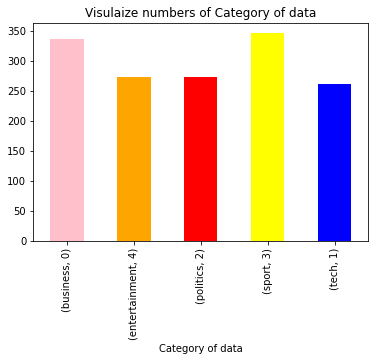

In [11]:
dataset.groupby('Category').CategoryId.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

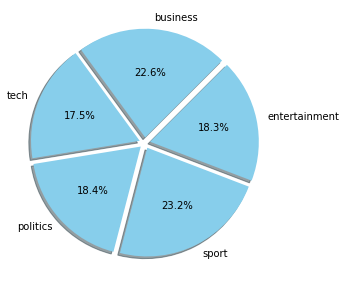

In [12]:
fig = plt.figure(figsize = (5,5))
colors = ["skyblue"]
business = dataset[dataset['CategoryId'] == 0 ]
tech = dataset[dataset['CategoryId'] == 1 ]
politics = dataset[dataset['CategoryId'] == 2]
sport = dataset[dataset['CategoryId'] == 3]
entertainment = dataset[dataset['CategoryId'] == 4]
count = [business['CategoryId'].count(), tech['CategoryId'].count(), politics['CategoryId'].count(), sport['CategoryId'].count(), entertainment['CategoryId'].count()]
pie = plt.pie(count, labels = ['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))

In [13]:
from wordcloud import WordCloud

stop = set(stopwords.words('english'))

business = dataset[dataset['CategoryId'] == 0]

business = business['Text']

tech = dataset[dataset['CategoryId'] == 1]

tech = tech['Text']

politics = dataset[dataset['CategoryId'] == 2]

politics = politics['Text']

sport = dataset[dataset['CategoryId'] == 3]

sport = sport['Text']

entertainment = dataset[dataset['CategoryId'] == 4]

entertainment = entertainment['Text']



In [14]:
text = dataset["Text"]
text.head(10)

0    worldcom ex-boss launches defence lawyers defe...
1    german business confidence slides german busin...
2    bbc poll indicates economic gloom citizens in ...
3    lifestyle  governs mobile choice  faster  bett...
4    enron bosses in $168m payout eighteen former e...
5    howard  truanted to play snooker  conservative...
6    wales silent on grand slam talk rhys williams ...
7    french honour for director parker british film...
8    car giant hit by mercedes slump a slump in pro...
9    fockers fuel festive film chart comedy meet th...
Name: Text, dtype: object

In [15]:
category = dataset['Category']
category.head(10)

0         business
1         business
2         business
3             tech
4         business
5         politics
6            sport
7    entertainment
8         business
9    entertainment
Name: Category, dtype: object

In [16]:
def remove_tags(text):
  remove = re.compile(r'')
  return re.sub(remove, '', text)
dataset['Text'] = dataset['Text'].apply(remove_tags)
dataset['Text']

0       worldcom ex-boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens in ...
3       lifestyle  governs mobile choice  faster  bett...
4       enron bosses in $168m payout eighteen former e...
                              ...                        
1485    double eviction from big brother model caprice...
1486    dj double act revamp chart show dj duo jk and ...
1487    weak dollar hits reuters revenues at media gro...
1488    apple ipod family expands market apple has exp...
1489    santy worm makes unwelcome visit thousands of ...
Name: Text, Length: 1490, dtype: object

In [17]:
#def special_char(text):
 # reviews = ''
 #  if x.isalnum():
  #    reviews = reviews + x
   # else:
    #  reviews = reviews + ' '
    #return reviews

#dataset['Text'] = dataset['Text'].apply(special_char)
#dataset['Text']

In [18]:
def convert_lower(text):
     return text.lower()
dataset['Text'] = dataset['Text'].apply(convert_lower)

In [19]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]
dataset['Text'] = dataset['Text'].apply(remove_stopwords)
dataset

,ArticleId,Text,Category,CategoryId
0,1833,"[worldcom, ex-boss, launches, defence, lawyers...",business,0
1,154,"[german, business, confidence, slides, german,...",business,0
2,1101,"[bbc, poll, indicates, economic, gloom, citize...",business,0
3,1976,"[lifestyle, governs, mobile, choice, faster, b...",tech,1
4,917,"[enron, bosses, $, 168m, payout, eighteen, for...",business,0
...,...,...,...,...
1485,857,"[double, eviction, big, brother, model, capric...",entertainment,4
1486,325,"[dj, double, act, revamp, chart, show, dj, duo...",entertainment,4
1487,1590,"[weak, dollar, hits, reuters, revenues, media,...",business,0
1488,1587,"[apple, ipod, family, expands, market, apple, ...",tech,1


In [20]:
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
dataset['Text'] = dataset['Text'].apply(lemmatize_word)
dataset

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex-boss launch defence lawyer defendi...,business,0
1,154,german business confidence slide german busine...,business,0
2,1101,bbc poll indicates economic gloom citizen majo...,business,0
3,1976,lifestyle governs mobile choice faster better ...,tech,1
4,917,enron boss $ 168m payout eighteen former enron...,business,0
...,...,...,...,...
1485,857,double eviction big brother model caprice holb...,entertainment,4
1486,325,dj double act revamp chart show dj duo jk joel...,entertainment,4
1487,1590,weak dollar hit reuters revenue medium group r...,business,0
1488,1587,apple ipod family expands market apple expande...,tech,1


In [21]:
print(dataset)

      ArticleId                                               Text  \
0          1833  worldcom ex-boss launch defence lawyer defendi...   
1           154  german business confidence slide german busine...   
2          1101  bbc poll indicates economic gloom citizen majo...   
3          1976  lifestyle governs mobile choice faster better ...   
4           917  enron boss $ 168m payout eighteen former enron...   
...         ...                                                ...   
1485        857  double eviction big brother model caprice holb...   
1486        325  dj double act revamp chart show dj duo jk joel...   
1487       1590  weak dollar hit reuters revenue medium group r...   
1488       1587  apple ipod family expands market apple expande...   
1489        538  santy worm make unwelcome visit thousand websi...   

           Category  CategoryId  
0          business           0  
1          business           0  
2          business           0  
3              tech    

In [22]:
x = dataset['Text']
y = dataset['CategoryId']
type(x[0])

str

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.CategoryId.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(dataset.Text).toarray()
print(type(dataset.Text))
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

<class 'pandas.core.series.Series'>
X.shape =  (1490, 5000)
y.shape =  (1490,)


In [25]:
def change_text(text):
    text = remove_tags(text)
    text = convert_lower(text)
    text = remove_stopwords(text)
    text = lemmatize_word(text)
    return text

text_out = change_text('covid 19')
type(text_out)

str

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

1043
447


In [28]:
classifier =RandomForestClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
# Performance metrics

accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

# Get precision, recall, f1 scores

precision, recall, f1score, support = score(y_test, y_pred, average='micro')

print(f'Test Accuracy Score of Basic Random Forest {accuracy}')

print(f'Precision : {precision}')

print(f'Recall : {recall}')

print(f'F1-score : {f1score}')



Test Accuracy Score of Basic Random Forest 96.2
Precision : 0.9619686800894854
Recall : 0.9619686800894854
F1-score : 0.9619686800894854


In [34]:
#from sklearn.naive_bayes import MultinomialNB
#model = MultinomialNB()
#model.fit(x_train,y_train)

MultinomialNB()

In [80]:
#y_pred1 = cv.transform(['Worldwide oil prices at an all time high due to covid'])
user = input("Enter a Text:")
my_prediction = change_text(user)
my_prediction = pd.Series(my_prediction)

#my_prediction = my_prediction.ravel()
new = cv.transform(my_prediction)

yy = classifier.predict(new)
print(yy)


Enter a Text: South Africa's flood-ravaged east was hit by more rain Saturday after the deadliest storm to strike the country in living memory killed nearly 400 people and left tens of thousands homeless. Floodwaters engulfed parts of the southeastern coastal city of Durban this week ripping apart roads, destroying hospitals and sweeping away homes and those trapped inside. Emergency services in the southeastern KwaZulu-Natal (KZN) province, where Durban is located off the Indian Ocean coast, were on high alert. Recovery operations and humanitarian relief were underway in the city of 3.5 million which would normally have been teeming with Easter holidaymakers this weekend. "Sadly there are still bodies being recovered from homesteads, especially from the rural areas," Shawn Herbst of the first responder company Netcare 911 told AFP. "There is still damage taking place, especially with the rain we are experiencing today." The death toll rose on Saturday by three, to 398 while 27 people 

In [81]:
result = ""
if yy == [0]:
  result = "Business News"
elif yy == [1]:
  result = "Tech News"
elif yy == [2]:
  result = "Politics News"
elif yy == [3]:
  result = "Sports News"
elif yy == [4]:
  result = "Entertainment News"
print(result)

Business News
